In [16]:
from langchain_community.tools.wikipedia.tool import WikipediaQueryRun
from langchain_community.utilities.wikipedia import WikipediaAPIWrapper

wiki = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(top_k_results=2))
result = wiki.run("Transformer models in AI")
print(len(result))
print(result)


2984
Page: Generative pre-trained transformer
Summary: A generative pre-trained transformer (GPT) is a type of large language model (LLM) and a prominent framework for generative artificial intelligence. It is an artificial neural network that is used in natural language processing by machines. It is based on the transformer deep learning architecture, pre-trained on large data sets of unlabeled text, and able to generate novel human-like content. As of 2023, most LLMs had these characteristics and are sometimes referred to broadly as GPTs.
The first GPT was introduced in 2018 by OpenAI. OpenAI has released significant GPT foundation models that have been sequentially numbered, to comprise its "GPT-n" series. Each of these was significantly more capable than the previous, due to increased size (number of trainable parameters) and training. The most recent of these, GPT-4o, was released in May 2024. Such models have been the basis for their more task-specific GPT systems, including mode

In [24]:
from langchain_community.tools.wikipedia.tool import WikipediaQueryRun
from langchain_community.utilities.wikipedia import WikipediaAPIWrapper

def search_wikipedia(topic: str, top_k: int = 2):
    """
    Searches Wikipedia using LangChain's wrapper and returns structured results.
    
    Parameters:
        topic (str): The topic to search for.
        top_k (int): Number of top results to return.
    
    Returns:
        List[dict]: Each result contains title, summary (page_content), and URL.
    """
    # Create API wrapper with limited results
    wiki_api = WikipediaAPIWrapper(top_k_results=top_k)
    wiki_tool = WikipediaQueryRun(api_wrapper=wiki_api)

    # Load raw results as document objects
    docs = wiki_api.load(topic)

    # Structure the results
    structured_results = []
    for doc in docs:
        result = {
            "title": doc.metadata.get("title", "Unknown Title"),
            "summary": doc.page_content,
            "url": f"https://en.wikipedia.org/wiki/{doc.metadata.get('title', '').replace(' ', '_')}"
        }
        structured_results.append(result)

    return structured_results


results = search_wikipedia("Transformer models in AI", top_k=2)

for i, res in enumerate(results, 1):
    print(f"\n🔹 Result {i}")
    print("Title:", res["title"])
    print("URL:", res["url"])
    print("Summary:", res["summary"]+ "...")



🔹 Result 1
Title: Generative pre-trained transformer
URL: https://en.wikipedia.org/wiki/Generative_pre-trained_transformer
Summary: A generative pre-trained transformer (GPT) is a type of large language model (LLM) and a prominent framework for generative artificial intelligence. It is an artificial neural network that is used in natural language processing by machines. It is based on the transformer deep learning architecture, pre-trained on large data sets of unlabeled text, and able to generate novel human-like content. As of 2023, most LLMs had these characteristics and are sometimes referred to broadly as GPTs.
The first GPT was introduced in 2018 by OpenAI. OpenAI has released significant GPT foundation models that have been sequentially numbered, to comprise its "GPT-n" series. Each of these was significantly more capable than the previous, due to increased size (number of trainable parameters) and training. The most recent of these, GPT-4o, was released in May 2024. Such model

In [26]:
from tavily import TavilyClient
import os

def search_tavily(query: str, max_results: int = 2):
    """
    Searches the web using Tavily API and returns structured results.

    Parameters:
        query (str): The search query string.
        max_results (int): Maximum number of search results to return.

    Returns:
        List[dict]: Each result contains title, content, and url.
    """
    # Get API key from environment
    TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")
    
    # Handle case where API key is not set
    if not TAVILY_API_KEY:
        raise ValueError("TAVILY_API_KEY not found in environment variables.")
    
    # Initialize Tavily client
    client = TavilyClient(api_key=TAVILY_API_KEY)
    
    # Perform the search
    response = client.search(query=query, max_results=max_results)
    
    # Structure the results
    structured_results = []
    for result in response.get("results", []):
        structured_results.append({
            "title": result.get("title", "No Title"),
            "url": result.get("url", ""),
            "content": result.get("content", "")
        })
    
    return structured_results


results = search_tavily("Transformer models in AI", max_results=2)

for i, res in enumerate(results, 1):
    print(f"\n🔹 Result {i}")
    print("Title:", res["title"])
    print("URL:", res["url"])
    print("Summary:", res["content"]+ "...")


🔹 Result 1
Title: Transformer (deep learning architecture) - Wikipedia
URL: https://en.wikipedia.org/wiki/Transformer_(deep_learning_architecture)
Summary: A transformer is a deep learning architecture that was developed by researchers at Google and is based on the multi-head attention mechanism, which was proposed in the 2017 paper "Attention Is All You Need".[1] Text is converted to numerical representations called tokens, and each token is converted into a vector via lookup from a word embedding table.[1] At each layer, each token is then contextualized within the scope of the context window with other (unmasked) tokens via a parallel multi-head attention mechanism, allowing the signal for key tokens to be amplified and less important tokens to be diminished. Many large language models, since they do not need to predict a whole new sequence from an input sequence, only use the encoder or decoder of the original transformer architecture....

🔹 Result 2
Title: What is a Transformer M

Client ID and Client Secret found -- Initializing -- AzureChatOpenAI


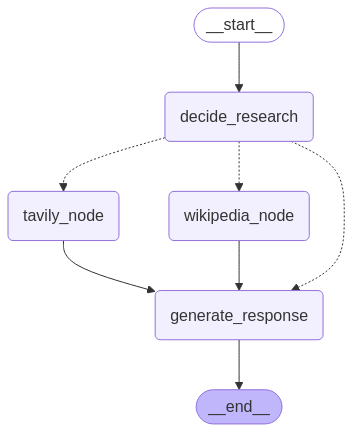

In [1]:
from research_Agent import graph
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))